# Data - an introduction to the world of Pandas

**Note:** This is an edited version of [Cliburn Chan's](http://people.duke.edu/~ccc14/sta-663-2017/07_Data.html) original tutorial, as part of his Stat-663 course at Duke.  All changes remain licensed as the original, under the terms of the MIT license.

Additionally, sections have been merged from [Chris Fonnesbeck's Pandas tutorial from the NGCM Summer Academy](https://github.com/fonnesbeck/ngcm_pandas_2017/blob/master/notebooks/1.%20Introduction%20to%20NumPy%20and%20Pandas.ipynb), which are licensed under [CC0 terms](https://creativecommons.org/share-your-work/public-domain/cc0) (aka 'public domain').

## Resources

- [The Introduction to Pandas chapter](http://proquest.safaribooksonline.com/9781491957653/pandas_html) in the Python for Data Analysis book by Wes McKinney is essential reading for this topic.  This is the [companion notebook](https://github.com/wesm/pydata-book/blob/2nd-edition/ch05.ipynb) for that chapter.
- [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- [QGrid](https://github.com/quantopian/qgrid)


## Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- **Tabular** data with heterogeneously-typed columns, as you might find in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) **time series** data.
- Arbitrary **matrix** data with row and column labels

Virtually any statistical dataset, labeled or unlabeled, can be converted to a pandas data structure for cleaning, transformation, and analysis.


### Key features
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [2]:
plt.style.use('seaborn-dark')

## Working with Series

* A pandas Series is a generationalization of 1d numpy array
* A series has an *index* that labels each element in the vector.
* A `Series` can be thought of as an ordered key-value store.

In [3]:
np.array(range(5,10))

array([5, 6, 7, 8, 9])

In [4]:
x = Series(range(5,10))

In [5]:
x

0    5
1    6
2    7
3    8
4    9
dtype: int64

### We can treat Series objects much like numpy vectors

In [6]:
x.sum(), x.mean(), x.std()

(35, 7.0, 1.5811388300841898)

In [7]:
x**2

0    25
1    36
2    49
3    64
4    81
dtype: int64

In [8]:
x[x >= 8]

3    8
4    9
dtype: int64

### Series can also contain more information than numpy vectors

#### You can always use standard positional indexing

In [9]:
x[1:4]

1    6
2    7
3    8
dtype: int64

#### Series index

But you can also assign labeled indexes.

In [10]:
x.index = list('abcde')
x

a    5
b    6
c    7
d    8
e    9
dtype: int64

#### Note that with labels, the end index is included

In [11]:
x['b':'d']

b    6
c    7
d    8
dtype: int64

#### Even when you have a labeled index, positional arguments still work

In [12]:
x[1:4]

b    6
c    7
d    8
dtype: int64

#### Working with missing data

Missing data is indicated with NaN (not a number).

In [13]:
y = Series([10, np.nan, np.nan, 13, 14])
y

0    10.0
1     NaN
2     NaN
3    13.0
4    14.0
dtype: float64

#### Concatenating two series

In [14]:
z = pd.concat([x, y])
z

a     5.0
b     6.0
c     7.0
d     8.0
e     9.0
0    10.0
1     NaN
2     NaN
3    13.0
4    14.0
dtype: float64

#### Reset index to default

In [15]:
z = z.reset_index(drop=True)
z

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     NaN
7     NaN
8    13.0
9    14.0
dtype: float64

In [16]:
z**2

0     25.0
1     36.0
2     49.0
3     64.0
4     81.0
5    100.0
6      NaN
7      NaN
8    169.0
9    196.0
dtype: float64

#### `pandas` aggregate functions ignore missing data

In [17]:
z.sum(), z.mean(), z.std()

(72.0, 9.0, 3.2071349029490928)

#### Selecting missing values

In [18]:
z[z.isnull()]

6   NaN
7   NaN
dtype: float64

#### Selecting non-missing values

In [19]:
z[z.notnull()]

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
8    13.0
9    14.0
dtype: float64

#### Replacement of missing values

In [20]:
z.fillna(0)

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     0.0
7     0.0
8    13.0
9    14.0
dtype: float64

In [21]:
z.fillna(method='ffill')

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6    10.0
7    10.0
8    13.0
9    14.0
dtype: float64

In [22]:
z.fillna(method='bfill')

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6    13.0
7    13.0
8    13.0
9    14.0
dtype: float64

In [23]:
z.fillna(z.mean())

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     9.0
7     9.0
8    13.0
9    14.0
dtype: float64

#### Working with dates / times

We will see more date/time handling in the DataFrame section.

In [24]:
z.index = pd.date_range('01-Jan-2016', periods=len(z))

In [25]:
z

2016-01-01     5.0
2016-01-02     6.0
2016-01-03     7.0
2016-01-04     8.0
2016-01-05     9.0
2016-01-06    10.0
2016-01-07     NaN
2016-01-08     NaN
2016-01-09    13.0
2016-01-10    14.0
Freq: D, dtype: float64

#### Intelligent aggregation over datetime ranges

In [26]:
z.resample('W').sum()

2016-01-03    18.0
2016-01-10    54.0
Freq: W-SUN, dtype: float64

#### Formatting datetime objects (see http://strftime.org)

In [27]:
z.index.strftime('%b %d, %Y')

array(['Jan 01, 2016', 'Jan 02, 2016', 'Jan 03, 2016', 'Jan 04, 2016',
       'Jan 05, 2016', 'Jan 06, 2016', 'Jan 07, 2016', 'Jan 08, 2016',
       'Jan 09, 2016', 'Jan 10, 2016'],
      dtype='<U12')

### DataFrames

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet.  It is directly inspired by the R DataFrame.

### Titanic data

In [28]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [29]:
titanic.shape

(891, 15)

In [30]:
titanic.size

13365

In [31]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [32]:
# For display purposes, we will drop some columns
titanic = titanic[['survived', 'sex', 'age', 'fare',
                   'embarked', 'class', 'who', 'deck', 'embark_town',]]

In [33]:
titanic.dtypes

survived         int64
sex             object
age            float64
fare           float64
embarked        object
class           object
who             object
deck            object
embark_town     object
dtype: object

### Summarizing a data frame

In [34]:
titanic.describe()

survived         age        fare
count  891.000000  714.000000  891.000000
mean     0.383838   29.699118   32.204208
std      0.486592   14.526497   49.693429
min      0.000000    0.420000    0.000000
25%      0.000000   20.125000    7.910400
50%      0.000000   28.000000   14.454200
75%      1.000000   38.000000   31.000000
max      1.000000   80.000000  512.329200

In [35]:
titanic.head(20)

survived     sex   age     fare embarked   class    who deck  embark_town
0          0    male  22.0   7.2500        S   Third    man  NaN  Southampton
1          1  female  38.0  71.2833        C   First  woman    C    Cherbourg
2          1  female  26.0   7.9250        S   Third  woman  NaN  Southampton
3          1  female  35.0  53.1000        S   First  woman    C  Southampton
4          0    male  35.0   8.0500        S   Third    man  NaN  Southampton
5          0    male   NaN   8.4583        Q   Third    man  NaN   Queenstown
6          0    male  54.0  51.8625        S   First    man    E  Southampton
7          0    male   2.0  21.0750        S   Third  child  NaN  Southampton
8          1  female  27.0  11.1333        S   Third  woman  NaN  Southampton
9          1  female  14.0  30.0708        C  Second  child  NaN    Cherbourg
10         1  female   4.0  16.7000        S   Third  child    G  Southampton
11         1  female  58.0  26.5500        S   First  woman    C  Southampton
12         0    male  20.0   8.0500        S   Third    man  NaN  Southampton
13         0    male  39.0  31.2750        S   Third    man  NaN  Southampton
14         0  female  14.0   7.8542        S   Third  child  NaN  Southampton
15         1  female  55.0  16.0000        S  Second  woman  NaN  Southampton
16         0    male   2.0  29.1250        Q   Third  child  NaN   Queenstown
17         1    male   NaN  13.0000        S  Second    man  NaN  Southampton
18         0  female  31.0  18.0000        S   Third  woman  NaN  Southampton
19         1  female   NaN   7.2250        C   Third  woman  NaN    Cherbourg

In [36]:
titanic.tail(5)

survived     sex   age   fare embarked   class    who deck  embark_town
886         0    male  27.0  13.00        S  Second    man  NaN  Southampton
887         1  female  19.0  30.00        S   First  woman    B  Southampton
888         0  female   NaN  23.45        S   Third  woman  NaN  Southampton
889         1    male  26.0  30.00        C   First    man    C    Cherbourg
890         0    male  32.0   7.75        Q   Third    man  NaN   Queenstown

In [37]:
titanic.columns

Index(['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who', 'deck',
       'embark_town'],
      dtype='object')

In [38]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

### Indexing

The default indexing mode for dataframes with `df[X]` is to access the DataFrame's *columns*:

In [39]:
titanic[['sex', 'age', 'class']].head()

sex   age  class
0    male  22.0  Third
1  female  38.0  First
2  female  26.0  Third
3  female  35.0  First
4    male  35.0  Third

#### Using the `iloc` helper for indexing

In [40]:
titanic.head(3)

survived     sex   age     fare embarked  class    who deck  embark_town
0         0    male  22.0   7.2500        S  Third    man  NaN  Southampton
1         1  female  38.0  71.2833        C  First  woman    C    Cherbourg
2         1  female  26.0   7.9250        S  Third  woman  NaN  Southampton

In [41]:
titanic.iloc

In [42]:
titanic.iloc[0]

survived                 0
sex                   male
age                     22
fare                  7.25
embarked                 S
class                Third
who                    man
deck                   NaN
embark_town    Southampton
Name: 0, dtype: object

In [43]:
titanic.iloc[0:5]

survived     sex   age     fare embarked  class    who deck  embark_town
0         0    male  22.0   7.2500        S  Third    man  NaN  Southampton
1         1  female  38.0  71.2833        C  First  woman    C    Cherbourg
2         1  female  26.0   7.9250        S  Third  woman  NaN  Southampton
3         1  female  35.0  53.1000        S  First  woman    C  Southampton
4         0    male  35.0   8.0500        S  Third    man  NaN  Southampton

In [44]:
titanic.iloc[ [0, 10, 1, 5] ]

survived     sex   age     fare embarked  class    who deck  embark_town
0          0    male  22.0   7.2500        S  Third    man  NaN  Southampton
10         1  female   4.0  16.7000        S  Third  child    G  Southampton
1          1  female  38.0  71.2833        C  First  woman    C    Cherbourg
5          0    male   NaN   8.4583        Q  Third    man  NaN   Queenstown

In [45]:
titanic.iloc[10:15]['age']

10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: age, dtype: float64

In [46]:
titanic.iloc[10:15][  ['age'] ]

age
10   4.0
11  58.0
12  20.0
13  39.0
14  14.0

In [47]:
titanic[titanic. < 2]

SyntaxError: invalid syntax (<ipython-input-47-0c88d841b460>, line 1)

In [48]:
titanic["new column"] = 0

In [49]:
titanic["new column"][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: new column, dtype: int64

In [50]:
titanic[titanic.age < 2].index

Int64Index([78, 164, 172, 183, 305, 381, 386, 469, 644, 755, 788, 803, 827,
            831],
           dtype='int64')

In [51]:
df = pd.DataFrame(dict(name=['Alice', 'Bob'], age=[20, 30]), 
                  columns = ['name', 'age'],  # enforce column order
                  index=pd.Series([123, 989], name='id'))
df

name  age
id             
123  Alice   20
989    Bob   30

### `.iloc` vs `.loc`

These are two accessors with a key difference:

* `.iloc` indexes *positionally*
* `.loc` indexes *by label*

In [52]:
#df[0]  # error
#df[123] # error
df.iloc[0]

name    Alice
age        20
Name: 123, dtype: object

In [53]:
df.loc[123]

name    Alice
age        20
Name: 123, dtype: object

In [54]:
df.loc[ [123] ]

name  age
id             
123  Alice   20

#### Sorting and ordering data

In [55]:
titanic.head()

survived     sex   age     fare embarked  class    who deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  NaN  Southampton   
1         1  female  38.0  71.2833        C  First  woman    C    Cherbourg   
2         1  female  26.0   7.9250        S  Third  woman  NaN  Southampton   
3         1  female  35.0  53.1000        S  First  woman    C  Southampton   
4         0    male  35.0   8.0500        S  Third    man  NaN  Southampton   

   new column  
0           0  
1           0  
2           0  
3           0  
4           0

The `sort_index` method is designed to sort a DataFrame by either its index or its columns:

In [56]:
titanic.sort_index(ascending=False).head()

survived     sex   age   fare embarked   class    who deck  embark_town  \
890         0    male  32.0   7.75        Q   Third    man  NaN   Queenstown   
889         1    male  26.0  30.00        C   First    man    C    Cherbourg   
888         0  female   NaN  23.45        S   Third  woman  NaN  Southampton   
887         1  female  19.0  30.00        S   First  woman    B  Southampton   
886         0    male  27.0  13.00        S  Second    man  NaN  Southampton   

     new column  
890           0  
889           0  
888           0  
887           0  
886           0

Since the Titanic index is already sorted, it's easier to illustrate how to use it for the index with a small test DF:

In [57]:
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150], columns=['A'])
df

A
100  1
29   2
234  3
1    4
150  5

In [58]:
df.sort_index() # same as df.sort_index('index')

A
1    4
29   2
100  1
150  5
234  3

Pandas also makes it easy to sort on the *values* of the DF:

In [59]:
titanic.sort_values('age', ascending=True).head()

survived     sex   age     fare embarked   class    who deck  \
803         1    male  0.42   8.5167        C   Third  child  NaN   
755         1    male  0.67  14.5000        S  Second  child  NaN   
644         1  female  0.75  19.2583        C   Third  child  NaN   
469         1  female  0.75  19.2583        C   Third  child  NaN   
78          1    male  0.83  29.0000        S  Second  child  NaN   

     embark_town  new column  
803    Cherbourg           0  
755  Southampton           0  
644    Cherbourg           0  
469    Cherbourg           0  
78   Southampton           0

And we can sort on more than one column in a single call:

In [60]:
titanic.sort_values(['survived', 'age'], ascending=[True, True]).head()

survived     sex  age     fare embarked  class    who deck  embark_town  \
164         0    male  1.0  39.6875        S  Third  child  NaN  Southampton   
386         0    male  1.0  46.9000        S  Third  child  NaN  Southampton   
7           0    male  2.0  21.0750        S  Third  child  NaN  Southampton   
16          0    male  2.0  29.1250        Q  Third  child  NaN   Queenstown   
119         0  female  2.0  31.2750        S  Third  child  NaN  Southampton   

     new column  
164           0  
386           0  
7             0  
16            0  
119           0

*Note:* both the index and the columns can be named:

In [61]:
t = titanic.sort_values(['survived', 'age'], ascending=[True, False])
t.index.name = 'id'
t.columns.name = 'attributes'
t.head()

attributes  survived   sex   age     fare embarked   class  who deck  \
id                                                                     
851                0  male  74.0   7.7750        S   Third  man  NaN   
96                 0  male  71.0  34.6542        C   First  man    A   
493                0  male  71.0  49.5042        C   First  man  NaN   
116                0  male  70.5   7.7500        Q   Third  man  NaN   
672                0  male  70.0  10.5000        S  Second  man  NaN   

attributes  embark_town  new column  
id                                   
851         Southampton           0  
96            Cherbourg           0  
493           Cherbourg           0  
116          Queenstown           0  
672         Southampton           0

#### Grouping data

In [62]:
sex_class = titanic.groupby(['sex', 'class'])

What is a GroubBy object?

In [63]:
sex_class

In [64]:
from IPython.display import display

for name, group in sex_class:
    print('name:', name, '\ngroup:\n')
    display(group.head(2))

name: ('female', 'First') 
group:



attributes  survived     sex   age     fare embarked  class    who deck  \
1                  1  female  38.0  71.2833        C  First  woman    C   
3                  1  female  35.0  53.1000        S  First  woman    C   

attributes  embark_town  new column  
1             Cherbourg           0  
3           Southampton           0

name: ('female', 'Second') 
group:



attributes  survived     sex   age     fare embarked   class    who deck  \
9                  1  female  14.0  30.0708        C  Second  child  NaN   
15                 1  female  55.0  16.0000        S  Second  woman  NaN   

attributes  embark_town  new column  
9             Cherbourg           0  
15          Southampton           0

name: ('female', 'Third') 
group:



attributes  survived     sex   age     fare embarked  class    who deck  \
2                  1  female  26.0   7.9250        S  Third  woman  NaN   
8                  1  female  27.0  11.1333        S  Third  woman  NaN   

attributes  embark_town  new column  
2           Southampton           0  
8           Southampton           0

name: ('male', 'First') 
group:



attributes  survived   sex   age     fare embarked  class  who deck  \
6                  0  male  54.0  51.8625        S  First  man    E   
23                 1  male  28.0  35.5000        S  First  man    A   

attributes  embark_town  new column  
6           Southampton           0  
23          Southampton           0

name: ('male', 'Second') 
group:



attributes  survived   sex   age  fare embarked   class  who deck  \
17                 1  male   NaN  13.0        S  Second  man  NaN   
20                 0  male  35.0  26.0        S  Second  man  NaN   

attributes  embark_town  new column  
17          Southampton           0  
20          Southampton           0

name: ('male', 'Third') 
group:



attributes  survived   sex   age  fare embarked  class  who deck  embark_town  \
0                  0  male  22.0  7.25        S  Third  man  NaN  Southampton   
4                  0  male  35.0  8.05        S  Third  man  NaN  Southampton   

attributes  new column  
0                    0  
4                    0

In [65]:
sex_class.get_group(('female', 'Second')).head()

attributes  survived     sex   age     fare embarked   class    who deck  \
9                  1  female  14.0  30.0708        C  Second  child  NaN   
15                 1  female  55.0  16.0000        S  Second  woman  NaN   
41                 0  female  27.0  21.0000        S  Second  woman  NaN   
43                 1  female   3.0  41.5792        C  Second  child  NaN   
53                 1  female  29.0  26.0000        S  Second  woman  NaN   

attributes  embark_town  new column  
9             Cherbourg           0  
15          Southampton           0  
41          Southampton           0  
43            Cherbourg           0  
53          Southampton           0

The GroubBy object has a number of aggregation methods that will then compute summary statistics over the group members, e.g.:

In [66]:
sex_class.count()

attributes     survived  age  fare  embarked  who  deck  embark_town  \
sex    class                                                           
female First         94   85    94        92   94    81           92   
       Second        76   74    76        76   76    10           76   
       Third        144  102   144       144  144     6          144   
male   First        122  101   122       122  122    94          122   
       Second       108   99   108       108  108     6          108   
       Third        347  253   347       347  347     6          347   

attributes     new column  
sex    class               
female First           94  
       Second          76  
       Third          144  
male   First          122  
       Second         108  
       Third          347

#### Why Kate Winslett survived and Leonardo DiCaprio didn't

In [67]:
sex_class.mean()[['survived']]

attributes     survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

#### Of the females who were in first class, count the number from each embarking town

In [68]:
sex_class.get_group(('female', 'First')).groupby('embark_town').count()

attributes   survived  sex  age  fare  embarked  class  who  deck  new column
embark_town                                                                  
Cherbourg          43   43   38    43        43     43   43    35          43
Queenstown          1    1    1     1         1      1    1     1           1
Southampton        48   48   44    48        48     48   48    43          48

Since `count` counts non-missing data, we're really interested in the maximum value for each row, which we can obtain directly:

In [69]:
sex_class.get_group(('female', 'First')).groupby('embark_town').count().max('columns')

embark_town
Cherbourg      43
Queenstown      1
Southampton    48
dtype: int64

#### Cross-tabulation

In [70]:
pd.crosstab(titanic.survived, titanic['class'])

class     First  Second  Third
survived                      
0            80      97    372
1           136      87    119

#### We can also get multiple summaries at the same time

The `agg` method is the most flexible, as it allows us to specify directly which functions we want to call, and where:

In [71]:
def my_func(x):
    return np.max(x)

In [72]:
mapped_funcs = {'embarked': 'count', 
                'age': ('mean', 'median', my_func), 
                'survived': sum}

sex_class.get_group(('female', 'First')).groupby('embark_town').agg(mapped_funcs)

embarked        age                survived
               count       mean median my_func      sum
embark_town                                            
Cherbourg         43  36.052632   37.0    60.0       42
Queenstown         1  33.000000   33.0    33.0        1
Southampton       48  32.704545   33.0    63.0       46

### Making plots with `pandas`

Note: you may need to run

```
pip install pandas-datareader
```

to install the specialized readers.

In [73]:
from pandas_datareader import data as web
import datetime

In [74]:
try:
    apple = pd.read_csv('data/apple.csv', index_col=0, parse_dates=True)
except:
    apple = web.DataReader('AAPL', 'yahoo', 
                            start = datetime.datetime(2015, 1, 1),
                            end = datetime.datetime(2015, 12, 31))
    # Let's save this data to a CSV file so we don't need to re-download it on every run:
    apple.to_csv('data/apple.csv')

In [75]:
apple.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  111.389999  111.440002  107.349998  109.330002  103.866470   
2015-01-05  108.290001  108.650002  105.410004  106.250000  100.940392   
2015-01-06  106.540001  107.430000  104.629997  106.260002  100.949890   
2015-01-07  107.199997  108.199997  106.699997  107.750000  102.365440   
2015-01-08  109.230003  112.150002  108.699997  111.889999  106.298531   

              Volume  
Date                  
2015-01-02  53204600  
2015-01-05  64285500  
2015-01-06  65797100  
2015-01-07  40105900  
2015-01-08  59364500

In [76]:
apple.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-24  109.000000  109.000000  107.949997  108.029999  104.380112   
2015-12-28  107.589996  107.690002  106.180000  106.820000  103.210999   
2015-12-29  106.959999  109.430000  106.860001  108.739998  105.066116   
2015-12-30  108.580002  108.699997  107.180000  107.320000  103.694107   
2015-12-31  107.010002  107.029999  104.820000  105.260002  101.703697   

              Volume  
Date                  
2015-12-24  13570400  
2015-12-28  26704200  
2015-12-29  30931200  
2015-12-30  25213800  
2015-12-31  40635300

Let's save this data to a CSV file so we don't need to re-download it on every run:

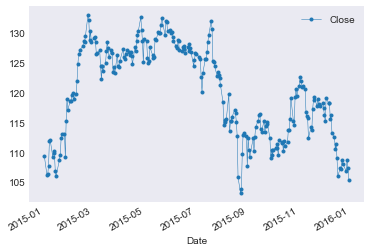

In [80]:
f, ax = plt.subplots()
apple.plot.line(y='Close', marker='o', markersize=3, linewidth=0.5, ax=ax);

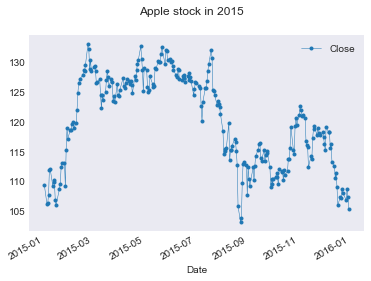

In [81]:
f.suptitle("Apple stock in 2015")
f

In [83]:
# Zoom in on large drop in August
aug = apple['2015-08-01':'2015-08-30']
aug.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-08-03  121.500000  122.570000  117.519997  118.440002  113.437157   
2015-08-04  117.419998  117.699997  113.250000  114.639999  109.797668   
2015-08-05  112.949997  117.440002  112.099998  115.400002  110.525574   
2015-08-06  115.970001  116.500000  114.120003  115.129997  110.766090   
2015-08-07  114.580002  116.250000  114.500000  115.519997  111.141319   

               Volume  
Date                   
2015-08-03   69976000  
2015-08-04  124138600  
2015-08-05   99312600  
2015-08-06   52903000  
2015-08-07   38670400

/Users/fperez/usr/conda/envs/s159/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


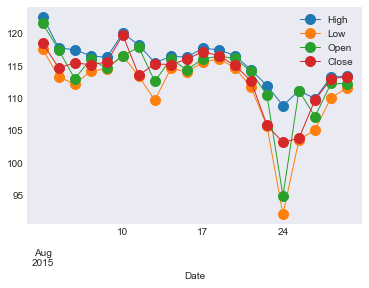

In [84]:
aug.plot.line(y=['High', 'Low', 'Open', 'Close'], marker='o', markersize=10, linewidth=1);

## Data conversions

One of the nicest features of `pandas` is the ease of converting tabular data across different storage formats. We will illustrate by converting the `titanic` dataframe into multiple formats.

### CSV

In [85]:
titanic.to_csv('titanic.csv', index=False)

In [86]:
t1 = pd.read_csv('titanic.csv')
t1.head(2)

survived     sex   age     fare embarked  class    who deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  NaN  Southampton   
1         1  female  38.0  71.2833        C  First  woman    C    Cherbourg   

   new column  
0           0  
1           0

### Excel

You may need to first install openpyxl:

```
pip install openpyxl
```

In [87]:
t1.to_excel('titanic.xlsx')

In [88]:
t2 = pd.read_excel('titanic.xlsx')
t2.head(2)

survived     sex   age     fare embarked  class    who deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  NaN  Southampton   
1         1  female  38.0  71.2833        C  First  woman    C    Cherbourg   

   new column  
0           0  
1           0

### Relational Database

In [89]:
import sqlite3

con = sqlite3.connect('titanic.db')
t2.to_sql('titanic', con, index=False, if_exists='replace')

/Users/fperez/usr/conda/envs/s159/lib/python3.6/site-packages/pandas/core/generic.py:1534: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [90]:
t3 = pd.read_sql('select * from titanic', con)
t3.head(2)

survived     sex   age     fare embarked  class    who  deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  None  Southampton   
1         1  female  38.0  71.2833        C  First  woman     C    Cherbourg   

   new column  
0           0  
1           0

### JSON

In [91]:
t3.to_json('titanic.json')

In [92]:
t4 = pd.read_json('titanic.json')
t4.head(2)

age  class  deck  embark_town embarked     fare  new column     sex  \
0  22.0  Third  None  Southampton        S   7.2500           0    male   
1  38.0  First     C    Cherbourg        C  71.2833           0  female   

   survived    who  
0         0    man  
1         1  woman

In [93]:
t4 = t4[t3.columns]
t4.head(2)

survived     sex   age     fare embarked  class    who  deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  None  Southampton   
1         1  female  38.0  71.2833        C  First  woman     C    Cherbourg   

   new column  
0           0  
1           0

### HDF5

The [HDF5 format](http://proquest.safaribooksonline.com/book/physics/9781491901564/10dot-storing-data-files-and-hdf5/chp_storing_data_html) was designed in the Earth Sciences community but it can be an excellent general purpose tool. It's efficient and type-safe, so you can store complex dataframes in it and recover them back without information loss, using the `to_hdf` method:

In [94]:
t4.to_hdf('titanic.h5', 'titanic')

/Users/fperez/usr/conda/envs/s159/lib/python3.6/site-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [95]:
t5 = pd.read_hdf('titanic.h5', 'titanic')
t5.head(2)

survived     sex   age     fare embarked  class    who  deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  None  Southampton   
1         1  female  38.0  71.2833        C  First  woman     C    Cherbourg   

   new column  
0           0  
1           0

#### Feather

You may need to install the [Feather](https://blog.cloudera.com/blog/2016/03/feather-a-fast-on-disk-format-for-data-frames-for-r-and-python-powered-by-apache-arrow) support first:

```
conda install -c conda-forge feather-format
```

In [96]:
t6 = t5.reset_index(drop=True)
t6.head()

survived     sex   age     fare embarked  class    who  deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  None  Southampton   
1         1  female  38.0  71.2833        C  First  woman     C    Cherbourg   
2         1  female   4.0  16.7000        S  Third  child     G  Southampton   
3         0  female  28.0   7.8958        S  Third  woman  None  Southampton   
4         0    male   NaN   7.8958        S  Third    man  None  Southampton   

   new column  
0           0  
1           0  
2           0  
3           0  
4           0

In [97]:
t6.to_feather('titanic.feather')

In [98]:
t7 = pd.read_feather('titanic.feather')
t7.head()

survived     sex   age     fare embarked  class    who  deck  embark_town  \
0         0    male  22.0   7.2500        S  Third    man  None  Southampton   
1         1  female  38.0  71.2833        C  First  woman     C    Cherbourg   
2         1  female   4.0  16.7000        S  Third  child     G  Southampton   
3         0  female  28.0   7.8958        S  Third  woman  None  Southampton   
4         0    male   NaN   7.8958        S  Third    man  None  Southampton   

   new column  
0           0  
1           0  
2           0  
3           0  
4           0